#### Task 3(a): Take grayscale image of size 512x512, apply average & median spatial filters with 5x5 mask & observe their performance for noise suppression in term of PSNR

### Importing the Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Average Spatial Filter
##### Function: output_image = cv2.blur(input_image, (kernel_size, kernel_size))

In [2]:
def average_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset, weight = mask_size // 2, mask_size * mask_size

    for r in range(height):
        for c in range(width):
            filtered_image[r, c] = 0;
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        filtered_image[r, c] += (image[r + x, c + y] / weight)
    
    return np.uint8(filtered_image)

### Function for Median Spatial Filter
##### Function: output_image = cv2.medianBlur(input_image, kernel_size)

In [3]:
def median_filter(image, mask_size):
    filtered_image = image.copy()
    height, width = filtered_image.shape
    offset = mask_size // 2

    for r in range(height):
        for c in range(width):
            pixels = []
            for x in range(-offset, offset + 1):
                for y in range(-offset, offset + 1):
                    if (r + x >= 0 and r + x < height and c + y >= 0 and c + y < width):
                        pixels.append(image[r + x, c + y])
            filtered_image[r, c] = sorted(pixels)[len(pixels) // 2]
    
    return np.uint8(filtered_image)

### Function for adding Salt & Pepper Noise

In [4]:
def add_salt_pepper_noise(image, percent):
    noisy_image = image.copy()
    noise_amount = (image.shape[0] * image.shape[1]) * (percent / 100)

    for k in range(int(noise_amount)):
        index = []
        for x in range(1, 5):
            index.append(np.random.randint(0, image.shape[0]))
        noisy_image[index[0], index[1]], noisy_image[index[2], index[3]] = 0, 255

    return noisy_image

### Function for calculating PSNR (Peak Signal to Noise Ratio)
##### Function: psnr = cv2.PSNR(image1, image2)

In [5]:
def compute_psnr(image1, image2):
    image1, image2 = np.float64(image1), np.float64(image2)
    mse = np.mean((image1 - image2) ** 2) 
    if mse == 0:
        return float('inf')
    psnr = 20 * np.log10(255.0) - 10 * np.log10(mse)
    
    return round(psnr, 2)

### Loading the Image

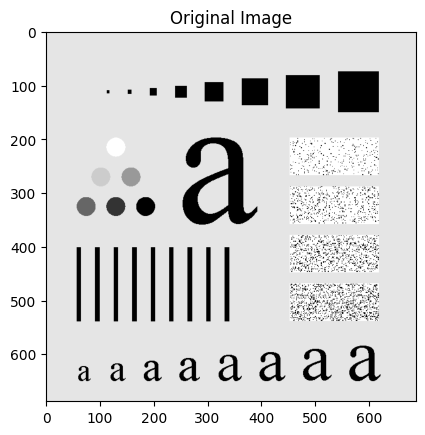

In [6]:
character_image = cv2.imread("./Characters Test Pattern 688x688.tif", 0)
plt.imshow(character_image, cmap = "gray")
plt.title("Original Image")
plt.show()

### Adding Salt & Pepper Noise to the Image

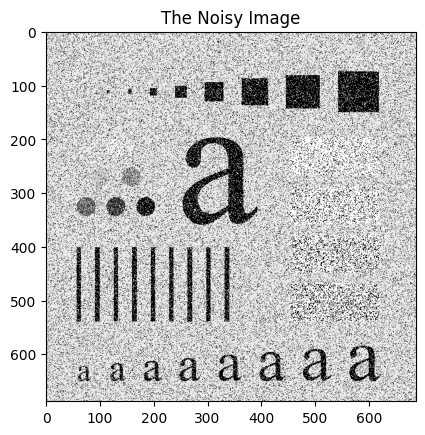

PSNR = 9.58


In [7]:
noisy_character_image = add_salt_pepper_noise(character_image, 15)
plt.imshow(noisy_character_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()
psnr = compute_psnr(character_image, noisy_character_image)
print(f"PSNR = {psnr}")

### Applying Average Spatial Filter

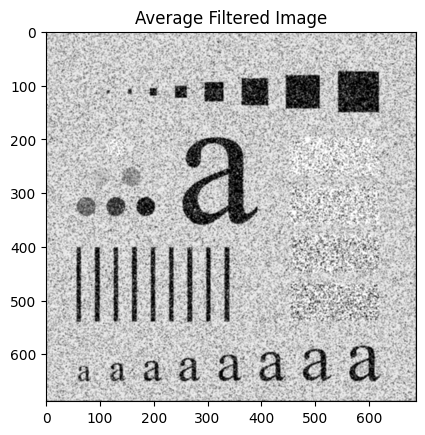

PSNR = 14.51


In [8]:
mask_size = 3
avg_character_image = average_filter(noisy_character_image, mask_size)
plt.imshow(avg_character_image, cmap = "gray")
plt.title("Average Filtered Image")
plt.show()
psnr = compute_psnr(avg_character_image, character_image)
print(f"PSNR = {psnr}")

### Applying Median Spatial Filter

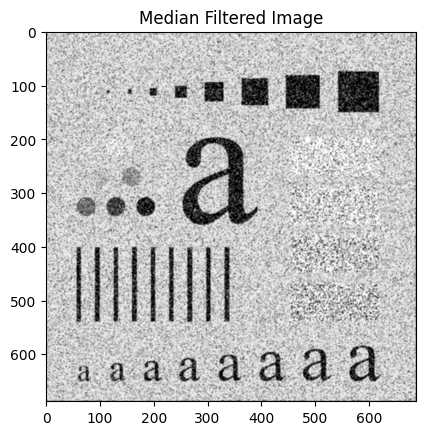

PSNR = 17.82


In [9]:
mask_size = 3
median_character_image = median_filter(noisy_character_image, mask_size)
plt.imshow(avg_character_image, cmap = "gray")
plt.title("Median Filtered Image")
plt.show()
psnr = compute_psnr(median_character_image, character_image)
print(f"PSNR = {psnr}")

### Loading the Noisy Image

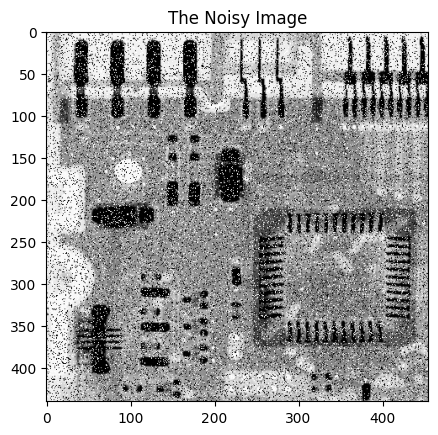

In [10]:
noisy_pcb_image = cv2.imread("./Noisy PCB 455x440.tif", 0)
plt.imshow(noisy_pcb_image, cmap = "gray")
plt.title("The Noisy Image")
plt.show()

### Applying Average Spatial Filter

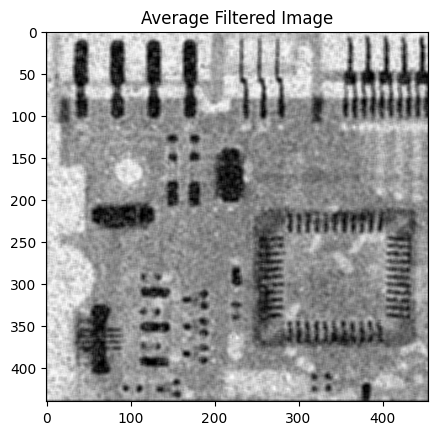

In [16]:
mask_size = 5
avg_noisy_pcb_image = average_filter(noisy_pcb_image, mask_size)
plt.imshow(avg_noisy_pcb_image, cmap = "gray")
plt.title("Average Filtered Image")
plt.show()

### Applying Median Spatial Filter

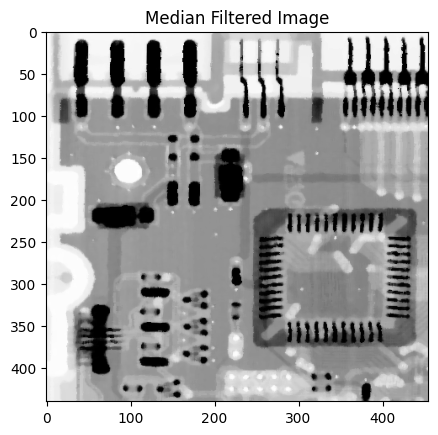

In [15]:
mask_size = 5
median_noisy_pcb_image = median_filter(noisy_pcb_image, mask_size)
plt.imshow(median_noisy_pcb_image, cmap = "gray")
plt.title("Median Filtered Image")
plt.show()